<a href="https://colab.research.google.com/github/Yannlpl/Yannlpl/blob/circleci-project-setup/Deep_learning_Tweets_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#       Deep learning with Text Mininig    
##                    Rennes School of Business
##                      Project 
####      
                               2022



For this task, you need to use tweet data for forcasting stock price.
The file Amazon.csv contains informaion on Tweets about Amazon stock from 2015 until 2020. For this task is to forecast stock price or return of Amazon with and without tweet data by applying deep learning model. You should find optimum configuration of deep learning with grid search. 


##Students name 	  Student No.	      

##Group: 

##To hand in
###Guidelines for report layout





# Section 1 Stentiment analysis of tweets

In [ ]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [ ]:
import pandas as pd
df = pd.read_csv("MSFT.csv")
df.head()

,Unnamed: 0,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,19,MSFT,GetAOM,1420071077,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,0,0,0
1,44,MSFT,BoilerWarrior,1420073758,"http://StockAviator.com....Top penny stocks, N...",0,0,0
2,46,MSFT,StocksThatDoubl,1420073765,Want alerts for momentum stocks about to run? ...,0,0,0
3,76,MSFT,The_Dumb_Money,1420076521,"IMHO, $MSFT shockingly remains MILDLY undervalued",1,0,0
4,83,MSFT,UnderGradStocks,1420076978,@CNNMoney I like $MSFT with him in charge. He ...,0,0,0


In [ ]:
#plot : all organization tweets, utiliser l'autre code, cloud, 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375938 entries, 0 to 375937
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     375938 non-null  int64 
 1   ticker_symbol  375938 non-null  object
 2   writer         374025 non-null  object
 3   post_date      375938 non-null  int64 
 4   body           375938 non-null  object
 5   comment_num    375938 non-null  int64 
 6   retweet_num    375938 non-null  int64 
 7   like_num       375938 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 22.9+ MB


In [ ]:
pip install pysentiment2

     |████████████████████████████████| 1.9 MB 22.8 MB/s 


In [ ]:
import pysentiment2 as ps
# Do something with pysentiment2

In [ ]:
def myhiv4sentiment (Data):
    hiv4sentiment = []
    hiv4 = ps.HIV4()
    for a in Data:
        tokens = hiv4.tokenize(a)
        scorehiv4 = hiv4.get_score(tokens)
        hiv4sentiment.append(scorehiv4)

    return hiv4sentiment 


In [ ]:
def myscorelmsentiment (Data):
    lmsentiment = []
    lm = ps.LM()
    for a in Data:  
        tokens = lm.tokenize(a)
        scorelm = lm.get_score(tokens)
        lmsentiment.append(scorelm)

    return lmsentiment 

In [ ]:
hiv4sentiment_score= pd.DataFrame.from_records(myhiv4sentiment(df['body']))
hiv4sentiment_score.columns = ['hiv4Positive'	,'hiv4Negative'	,'hiv4Polarity',	'hiv4Subjectivity']
df = df.join(hiv4sentiment_score)

In [ ]:
lmsentiment_score= pd.DataFrame.from_records(myscorelmsentiment(df['body']))
lmsentiment_score.columns = ['LMPositive'	,'LMNegative'	,'LMPolarity',	'LMSubjectivity']
df = df.join(lmsentiment_score)

In [ ]:
df.head(5)
#the polarity tells how positive or negative the text is
#the subjectivity (tells how subjective or opinionated the text is

,Unnamed: 0,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
0,19,MSFT,GetAOM,1420071077,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,0,0,0,1.0,0.0,0.999999,0.066667,0.0,0.0,0.000000,0.000000
1,44,MSFT,BoilerWarrior,1420073758,"http://StockAviator.com....Top penny stocks, N...",0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,46,MSFT,StocksThatDoubl,1420073765,Want alerts for momentum stocks about to run? ...,0,0,0,2.0,1.0,0.333333,0.214286,0.0,1.0,-0.999999,0.071429
3,76,MSFT,The_Dumb_Money,1420076521,"IMHO, $MSFT shockingly remains MILDLY undervalued",1,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,83,MSFT,UnderGradStocks,1420076978,@CNNMoney I like $MSFT with him in charge. He ...,0,0,0,4.0,2.0,0.333333,0.666667,2.0,0.0,1.000000,0.222222


In [ ]:
import datetime
df['Date'] = pd.to_datetime(df['post_date'],unit='s').dt.strftime('%Y-%m-%d')

In [ ]:
df = df.sort_values(by="Date")

In [ ]:
df.tail(5)

,Unnamed: 0,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity,Date
375796,4337051,MSFT,RandyAFrederick,1577802697,"In early-morning options action, equity names ...",0,0,0,3.0,0.0,1.000000,0.214286,0.0,0.0,0.0,0.0,2019-12-31
375797,4337058,MSFT,realsheepwolf,1577802789,$VERB JUST SHATTERED $1.40 RESISTANCE HERETHIS...,2,3,5,2.0,1.0,0.333333,0.083333,0.0,0.0,0.0,0.0,2019-12-31
375798,4337059,MSFT,Mind_Trading1,1577802811,$MSFTBigggg greeeennnn issss. Coming only reta...,0,0,0,1.0,1.0,0.000000,0.250000,0.0,0.0,0.0,0.0,2019-12-31
375787,4336952,MSFT,SentimEntropy,1577800802,Notable activity on social media recently for$...,0,0,0,1.0,1.0,0.000000,0.142857,0.0,0.0,0.0,0.0,2019-12-31
375937,4338763,MSFT,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,0.0,1.0,-0.999999,0.250000,0.0,0.0,0.0,0.0,2019-12-31


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = df.groupby(['Date']).mean()

In [ ]:
mean_c = mean_c.sort_values(by="Date")

In [ ]:
mean_c.tail(5)

,Unnamed: 0,post_date,comment_num,retweet_num,like_num,hiv4Positive,hiv4Negative,hiv4Polarity,hiv4Subjectivity,LMPositive,LMNegative,LMPolarity,LMSubjectivity
Date,,,,,,,,,,,,,
2019-12-27,4.328879e+06,1.577452e+09,0.267943,0.842105,2.650718,1.234450,0.732057,0.182456,0.111293,0.263158,0.244019,0.002119,0.028266
2019-12-28,4.331093e+06,1.577532e+09,0.621951,5.390244,13.585366,1.146341,0.304878,0.366260,0.100251,0.243902,0.292683,-0.016260,0.033705
2019-12-29,4.332328e+06,1.577628e+09,0.852941,4.426471,7.455882,1.691176,0.544118,0.443837,0.127887,0.279412,0.382353,-0.026961,0.038601
2019-12-30,4.334547e+06,1.577721e+09,0.228571,0.644898,2.885714,1.408163,0.583673,0.358574,0.118504,0.191837,0.200000,0.004762,0.024771
2019-12-31,4.337461e+06,1.577804e+09,0.284404,1.119266,2.848624,1.334862,0.655963,0.250087,0.118292,0.270642,0.183486,0.056575,0.030354


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = df.groupby(['Date']).count()
mean_c = mean_c.sort_values(by="Date")

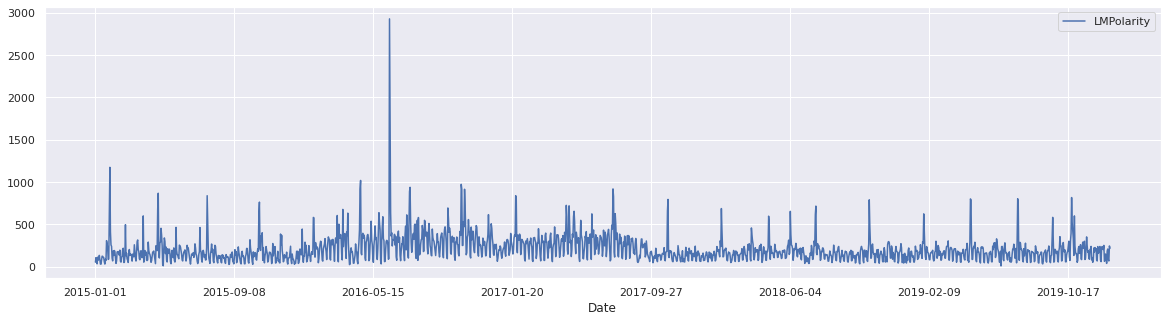

In [ ]:
# Number of tweets per day
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the count
df_count = df.groupby(['Date']).count()
# Get the cross-section of compound in the 'columns' axis
df_count_col = pd.DataFrame(df_count.xs('LMPolarity', axis='columns'))
# Plot a bar chart with pandas

df_count_col.plot( figsize=(20,5))

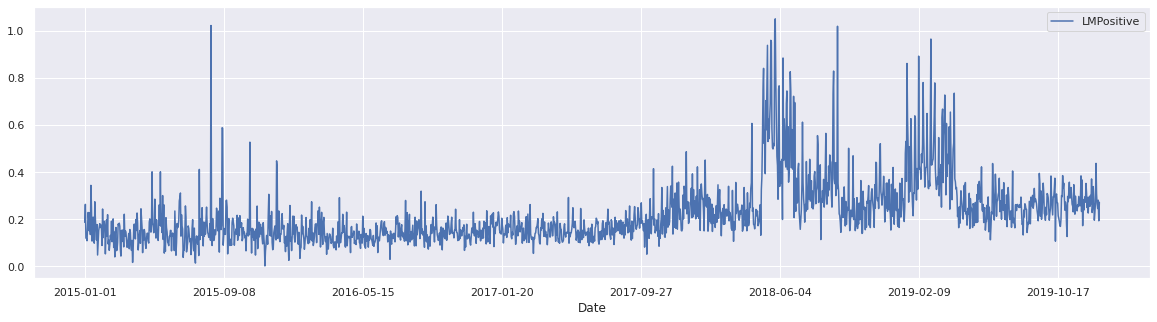

In [ ]:
# Positiv tweets
# Group by date and ticker columns from scored_news and calculate the count
df_count = df.groupby(['Date']).mean()
# Get the cross-section of compound in the 'columns' axis
df_count_col1 = pd.DataFrame(df_count.xs('LMPositive', axis='columns'))
# Plot a bar chart with pandas

df_count_col1.plot( figsize=(20,5))

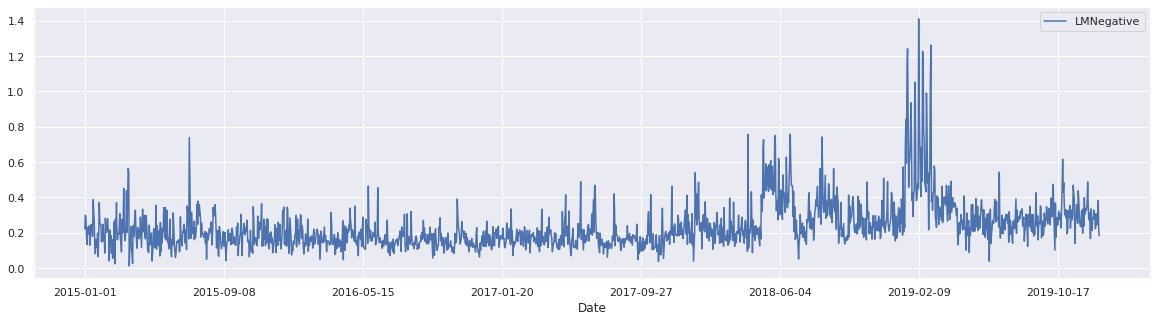

In [ ]:
# Negative tweets
# Group by date and ticker columns from scored_news and calculate the count
df_count = df.groupby(['Date']).mean()
# Get the cross-section of compound in the 'columns' axis
df_count_col2 = pd.DataFrame(df_count.xs('LMNegative', axis='columns'))
# Plot a bar chart with pandas

df_count_col2.plot( figsize=(20,5))

In [ ]:
#date,
#df_count_col['Date']=df_count_col.index
df_count_col=df_count_col.reset_index()
#date
df_count_col = df_count_col.sort_values(by="Date")

df_count_col1 = df_count_col1.reset_index()
df_count_col1 = df_count_col1.sort_values(by="Date")

In [ ]:
df_count_col1

,Date,LMPositive
0,2015-01-01,0.185185
1,2015-01-02,0.261682
2,2015-01-03,0.118644
3,2015-01-04,0.117647
4,2015-01-05,0.107143
...,...,...
1821,2019-12-27,0.263158
1822,2019-12-28,0.243902
1823,2019-12-29,0.279412
1824,2019-12-30,0.191837


In [ ]:
# Comparison ofnumber of tweets per day containing "MSFT" and MSFT stocks exchange volume
# Plot time series the close price and volume of stock price 
# Question 3: Explain the time series plots and try to identify important events
# On this graph we can see a big peak in june 13, 2016 due to the acquisition of Linkedin by Microsoft
# for 23 billions of dollars. 
# In fact this acquisition increase the amount of tweets on twiiter. 

import plotly.graph_objects as go

dfs_2 = data.loc[data['Date'] > '2015-01-06']
fig=go.Figure(data=[go.Scatter(name = 'Volume',x= dfs_2['Date'],y= dfs_2['Volume'])])
fig.update_layout(title="Volume of Microsoft's stock 2015-2022",xaxis_title="Date", yaxis_title="Volume")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= df_count_col1.Date,y= df_count_col1.LMPositive)])
fig.update_layout(title="Mean of Positive MSFT tweets",xaxis_title="Date", yaxis_title="Mean of Positive MSFT tweets")
fig.show()


## Question

Use Loughran and McDonald Financial Sentiment Dictionaries for  the follwing questions

Plot time series of the daily average of the number of tweets


Plot time series of the daily average of sentiment score of tweets

Plot time series of the daily average of positive score of tweets

Plot time series of the daily average of negative score of tweets

Plot time series of the daily average of subjectivity score of tweets

Explain each plot briefly



<AxesSubplot:xlabel='Date'>

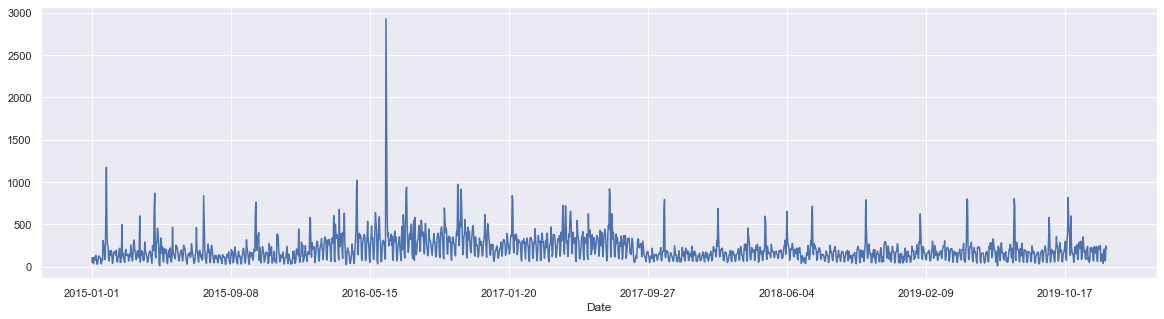

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

count_c = df.groupby(['Date']).count()


# Get the cross-section of compound in the 'columns' axis
count_col = count_c.xs('LMPolarity', axis='columns')

count_col.plot( figsize=(20,5))

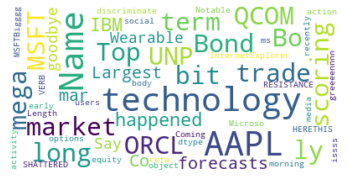

In [ ]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=40, max_words=1000, background_color="white",stopwords=STOPWORDS).generate(str(df['body']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

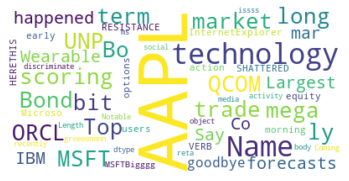

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["year", "now"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(df['body']))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

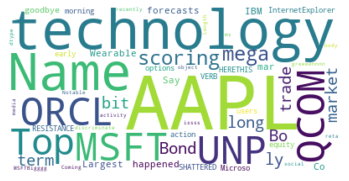

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["year", "now"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(df['body']))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 60, stopwords=STOPWORDS, max_words=500, background_color="white").generate(str(df['body']))

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
### Question 1 
 #Plot WordCloud of stopwords

 #Plot WordCloud of NOUN

 #Plot WordCloud of PROPN
 
 #Plot WordCloud of VERB

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

In [ ]:
import spacy
from spacy.lang.en.examples import sentences 

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(str(df['body']))
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

In [ ]:
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

In [ ]:
doc = nlp(str(df['body']))
doc

In [ ]:
for ent in doc.ents:
  print(ent.text, ent.label_)

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
a = [ent[0] for ent in doc.ents if ent.label_ == 'PROPN']
aa=str(a).strip('[]')
wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=100, max_words=1000, background_color="white").generate(aa)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
a

##  Download history data from yahoo finance

Please select the symbol of stock from this list

* Group.   Symbol | Company 
2.   AMZN | Amazon.com


In [ ]:
# The first the step is to download history data from yahoo finance.
# Install yahoo finance package 

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 60.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install keras

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 15.4 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np 
import pandas as pd
import plotly.graph_objs as go

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
MyTicker = yf.Ticker("MSFT")

In [ ]:
print(MyTicker.info)
## More options: https://github.com/ranaroussi/yfinance

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 181000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certificatio

In [ ]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
#data_s['Date'] = data_s.index
data_s=data_s.reset_index()

In [ ]:
data_s

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1,1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
2,1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
3,1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
4,1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...
9070,2022-03-08,277.799988,283.959991,270.000000,275.850006,48159500,0.0,0.0
9071,2022-03-09,283.440002,289.600006,280.779999,288.500000,35204500,0.0,0.0
9072,2022-03-10,283.019989,286.600006,280.579987,285.589996,30628000,0.0,0.0
9073,2022-03-11,287.959991,289.510010,279.429993,280.070007,27192600,0.0,0.0


In [ ]:
# Question 2: check data and provide statistical description of stock price, Explain?
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

              Open         High          Low        Close        Volume  \
count  9075.000000  9075.000000  9075.000000  9075.000000  9.075000e+03   
mean     36.005032    36.373913    35.624402    36.012968  5.877205e+07   
std      59.500679    60.068864    58.888872    59.509140  3.846256e+07   
min       0.055783     0.057971     0.055783     0.056877  2.304000e+06   
25%       2.547147     2.564375     2.529920     2.544686  3.464160e+07   
50%      18.916131    19.120596    18.698300    18.927227  5.204780e+07   
75%      29.149708    29.463236    28.744614    29.143347  7.270295e+07   
max     343.908878   348.948476   341.493913   342.402008  1.031789e+09   

         Dividends  Stock Splits  
count  9075.000000   9075.000000  
mean      0.002494      0.001873  
std       0.042844      0.059818  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       3.080000      2.000000  


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.055783,0.063987,0.055783,0.061252,1031788800,0.0,0.0
1,1986-03-14,0.061252,0.064533,0.061252,0.063439,308160000,0.0,0.0
2,1986-03-17,0.063439,0.065080,0.063439,0.064533,133171200,0.0,0.0
3,1986-03-18,0.064533,0.065080,0.062345,0.062892,67766400,0.0,0.0
4,1986-03-19,0.062892,0.063439,0.061252,0.061799,47894400,0.0,0.0


## Analysis of time series of Stock Price

In [ ]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

In [ ]:
# Plot time series the close price and volume of stock price 
# Question 3: Explain the time series plots and try to identify important events
  
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price of Microsoft 1986-2022",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume of Microsoft's stock 1986-2022",xaxis_title="Date", yaxis_title="Volume")
fig.show()


In [ ]:
# Extracting Date and Close from the Dataframe.
data_extr = data_s[['Date','Close']]
df_extr = df[['comment_num'	,'retweet_num',	'like_num',	'Date',	'hiv4Positive',	'hiv4Negative',	'hiv4Polarity',	'hiv4Subjectivity',	'LMPositive',	'LMNegative',	'LMPolarity',	'LMSubjectivity']]

In [ ]:
mean_c = df_extr.groupby(['Date']).mean()
mean_c=mean_c.reset_index()
mean_c['Date'] = pd.to_datetime(mean_c.Date)
mean_c['Date'] = mean_c['Date'].dt.strftime('%Y-%m-%d')
mean_c['Date'] = mean_c['Date'].astype(str)
data_extr['Date'] = data_extr['Date'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Final=mean_c.join(data_extr.set_index('Date'), on = 'Date')
Final.dropna(inplace=True) 

In [ ]:
Final.head

<bound method NDFrame.head of             Date  comment_num  retweet_num  like_num  hiv4Positive  \
1     2015-01-02     0.112150     0.233645  0.495327      0.906542   
4     2015-01-05     0.142857     0.625000  0.830357      0.651786   
5     2015-01-06     0.025641     0.166667  0.307692      1.000000   
6     2015-01-07     0.068182     0.318182  0.534091      1.079545   
7     2015-01-08     0.052239     0.223881  0.432836      1.223881   
...          ...          ...          ...       ...           ...   
1818  2019-12-24     0.174603     0.849206  1.857143      1.507937   
1820  2019-12-26     0.155914     0.666667  2.263441      1.268817   
1821  2019-12-27     0.267943     0.842105  2.650718      1.234450   
1824  2019-12-30     0.228571     0.644898  2.885714      1.408163   
1825  2019-12-31     0.284404     1.119266  2.848624      1.334862   

      hiv4Negative  hiv4Polarity  hiv4Subjectivity  LMPositive  LMNegative  \
1         0.990654     -0.052336          0.162718 

In [ ]:
# run this function to split dataset. Explain how this function split financial data set. Why we cannot split financial
# time seires to train and test randomly?   

def Split_Train_Test(data, test_ratio):
    '''splits data into a training and testing set'''
    train_set_size = 1 - int(len(data) * test_ratio)
    train_set = data[:train_set_size]
    test_set = data[train_set_size:]
    return train_set, test_set

In [ ]:
dataset_foranalysis=Final.drop(['Date'], axis=1)
# use above function to split data to (30%-70%). 
train, test = Split_Train_Test(dataset_foranalysis, 0.3)

In [ ]:
lags = range(1, 5)  # Just two lags for demonstration.

train_XX=train.loc[:, train.columns != 'Close']
train_XXlag=train_XX.assign(**{
  f'{col} (t-{lag})': train_XX[col].shift(lag)
  for lag in lags
  for col in train_XX
  })
Y_train = train["Close"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows
train_XXlag.drop(train_XXlag.head(5).index,inplace=True) # drop last n rows


test_XX=test.loc[:, test.columns != 'Close']
test_XXlag=test_XX.assign(**{
  f'{col} (t-{lag})': test_XX[col].shift(lag)
  for lag in lags
  for col in test_XX
  })

Y_test = test["Close"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows
test_XXlag.drop(test_XXlag.head(5).index,inplace=True) # drop last n rows


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_XX=train.loc[:, train.columns != 'Close']
X_train=pd.concat([train_XX.shift(1),train_XX.shift(2),train_XX.shift(3),train_XX.shift(4),train_XX.shift(5)], axis=1).dropna()

Y_train = train["Close"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows

#####################
### test
test_XX=test.loc[:, test.columns != 'Close']
#X_test=pd.concat([test.shift(1)], axis=1).dropna()
X_test=pd.concat([test_XX.shift(1),test_XX.shift(2),test_XX.shift(3),test_XX.shift(4),test_XX.shift(5)], axis=1).dropna()

Y_test = test["Close"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 6 Deep learning model with LSTM

In [ ]:
print(train_XXlag.shape, test_XXlag.shape)
print(Y_train.shape, Y_test.shape)

(877, 55) (371, 55)
(877,) (371,)


In [ ]:
Y_train = np.expand_dims(Y_train,-1)
Y_test = np.expand_dims(Y_test,-1)
X_train = np.expand_dims(X_train,-1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.fit_transform(Y_test)

In [ ]:
import tensorflow as tf

# Model 1

In [ ]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(train_XXlag.shape[1], 1)))
#model.add(Dense(128, activation='relu', input_shape=(None, 55)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss="mse",metrics=["mse"])
#model.compile(optimizer='adam', loss='mse', metrics=['mse']) # accuracy a du sens que dans la classifiaction
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


# Model 2

In [ ]:
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(10, activation='relu', input_shape=(train_XXlag.shape[1], 1), return_sequences=True))
model.add(LSTM(10, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu')) # Layer 1

model.add(Dense(1, activation='relu')) # Layer 10
model.add(Dropout(0.5))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss="mse",metrics=["mse"])
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 55, 100)           40800     
                                                                 
 lstm_51 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_40 (Dropout)        (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 1)                 101       
                                                                 
 dropout_41 (Dropout)        (None, 1)                 0         
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def scheduler(epoch, lr):
  if epoch < 40:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#history = model.fit(train_XXlag,Y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)
history = model.fit(train_XXlag,Y_train, batch_size=32, epochs=100, verbose=1, validation_data=(test_XXlag, Y_test), callbacks=[callback]) # fitting the model to the training dataset


Epoch 1/100
28/28 [==============================] - 2s 33ms/step - loss: 0.1683 - mse: 0.1683 - val_loss: 0.1933 - val_mse: 0.1933 - lr: 1.0000e-04
Epoch 2/100
28/28 [==============================] - 1s 21ms/step - loss: 0.1634 - mse: 0.1634 - val_loss: 0.1821 - val_mse: 0.1821 - lr: 1.0000e-04
Epoch 3/100
28/28 [==============================] - 1s 22ms/step - loss: 0.1560 - mse: 0.1560 - val_loss: 0.1712 - val_mse: 0.1712 - lr: 1.0000e-04
Epoch 4/100
28/28 [==============================] - 1s 22ms/step - loss: 0.1488 - mse: 0.1488 - val_loss: 0.1601 - val_mse: 0.1601 - lr: 1.0000e-04
Epoch 5/100
28/28 [==============================] - 1s 22ms/step - loss: 0.1410 - mse: 0.1410 - val_loss: 0.1494 - val_mse: 0.1494 - lr: 1.0000e-04
Epoch 6/100
28/28 [==============================] - 1s 22ms/step - loss: 0.1335 - mse: 0.1335 - val_loss: 0.1387 - val_mse: 0.1387 - lr: 1.0000e-04
Epoch 7/100
28/28 [==============================] - 1s 22ms/step - loss: 0.1309 - mse: 0.1309 - val_loss:

Mean_loss 0.07674331154674291
Mean_val_loss 0.09558004513382912


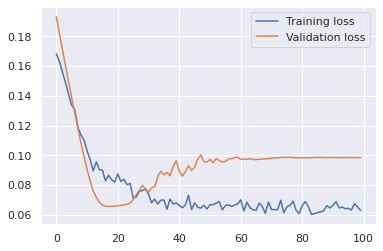

In [ ]:
# mean loss and mean val loss of linear model
Mean_loss = np.mean(history.history['loss'])
print('Mean_loss', Mean_loss)
Mean_val_loss= np.mean(history.history['val_loss'])
print('Mean_val_loss', Mean_val_loss)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
p_test = model.predict(test_XXlag)

In [ ]:
y_pred_future = scaler.inverse_transform(p_test)
Y_test = scaler.inverse_transform(Y_test)

In [ ]:
df_forecast = pd.DataFrame({'Date':Final.Date[-y_pred_future.shape[0]:],'Close':y_pred_future[:,0]})
df_forecast.head(5)

,Date,Close
1288,2018-07-12,121.295792
1289,2018-07-13,119.800377
1292,2018-07-16,119.443695
1293,2018-07-17,124.899948
1294,2018-07-18,129.671478


# Model 1 LSTM 100

In [ ]:
fig2=go.Figure(data=[go.Scatter(name = 'Close',x= Final['Date'],y= Final['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])])
fig2.show()

Les pics dans les prévisions correspondent totalement aux hauts volumes de tweets positifs !! Observe pour février le nb de tweets positifs et la prévision du stock price pour février

# MODEL 1 LSTM 10

In [ ]:
fig2=go.Figure(data=[go.Scatter(name = 'Close',x= Final['Date'],y= Final['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])])
fig2.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= df_count_col1.Date,y= df_count_col1.LMPositive)])
fig.update_layout(title="Mean of Positive MSFT tweets",xaxis_title="Date", yaxis_title="Mean of Positive MSFT tweets")
fig.show()

We can observe that our prediction follows the number of Positive and Negative tweets that we have in our dataset. In fact the model works quiet well. However, it is not appropriate to predict the stock price because it can't take into account the multiplicative dimension of stock price and also it is too sensible to tweets variation. We can observe also that the stock price is not moving in the same way than positive tweets. For instance, in february 2019, we have a peak in the mean of positive tweets, however, we can see that the real stock market price does nott increase as much.

# MODEL 2 LSTMx2 100

In [ ]:
# Ploting the predicted 'Close' Stock Price with Original 'Close' Stock Price.
# 
import plotly.graph_objs as go

fig2=go.Figure(data=[go.Scatter(name = 'Close',x= Final['Date'],y= Final['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])])
fig2.show()

In [ ]:
# which sum_err should we use ?

In [ ]:
sum_err = np.sum((Final.Close[-y_pred_future.shape[0]:]-df_forecast['Close'])**2)

print(sum_err)

x = (1/(len(df_forecast))*sum_err)

stdev = np.sqrt(x)

interval =  1.645*stdev

print(interval)


186015.8138275316
36.83442381701743


In [ ]:
df_forecast['Close Confidence Min'] = df_forecast['Close'] - interval

df_forecast['Close Confidence Max'] = df_forecast['Close'] + interval

df_forecast['Original Close'] = Final.Close[-y_pred_future.shape[0]:]

df_forecast

,Date,Close,Close Confidence Min,Close Confidence Max,Original Close
1288,2018-07-12,122.191010,85.356583,159.025436,99.726944
1289,2018-07-13,121.006859,84.172440,157.841278,100.913803
1292,2018-07-16,120.912437,84.078018,157.746857,100.416107
1293,2018-07-17,127.441345,90.606918,164.275772,101.411552
1294,2018-07-18,133.913025,97.078598,170.747452,100.617111
...,...,...,...,...,...
1818,2019-12-24,143.346130,106.511703,180.180557,154.117065
1820,2019-12-26,151.261032,114.426605,188.095459,155.380310
1821,2019-12-27,138.722580,101.888153,175.557007,155.664322
1824,2019-12-30,142.206467,105.372040,179.040894,154.322693


In [ ]:
fig3=go.Figure(data=[
                        go.Scatter(
                                    name = 'Close',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Original Close']),
                     
                        go.Scatter(
                                    name = 'Close Predicted',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close']),

                        go.Scatter(
                                    name='Upper Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Max'],
                                    mode='lines',
                                    marker=dict(color="green"),
                                    line=dict(width=1),
                                    showlegend=False),

                         go.Scatter(
                                    name='Lower Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Min'],
                                    marker=dict(color="purple"),
                                    line=dict(width=1),
                                    mode='lines',
                                    fillcolor='rgba(68, 68, 68, 0.3)',
                                    fill='tonexty',
                                    showlegend=False)

                    ])

fig3.show()

In [ ]:
# Below this one is the old code to use

# Cross-validation
Keras allows us to make use of cross-validation for training our model. So we will use this to train and assess our first model.

### Create Deep learning model
For this task, You must keep the model architecture pretty simple. 
The following function allows to parameterise the choice of hyperparameters in the deep learning. It will come in super handy when we move onto tuning our parameters later.

In [ ]:
def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=[1], init='uniform', nbr_features=train_XXlag.shape[0], dense_nparams=3):
    model = Sequential()
    model.add(LSTM(dense_nparams, activation='relu', input_shape=(train_XXlag.shape[1], 1), return_sequences=True))
    model.add(LSTM(dense_nparams, activation='relu', return_sequences=False))
    model.add(Dropout(dropout))

    for i in range(1,len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[i], activation=act))
        model.add(Dropout(dropout) )

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer,metrics=["mse"])
    return model

In [ ]:
##Question 15:  Explain briefly create_model function, (why we need this function?, inputs, output, how it works?)

### Train model
At this stage, we have our model. We have chosen a few hyperparameters such as the number of hidden layers, the number of neurons and the activation function.

The next step is to train the model on our training set. This step also requires us to choose a few more hyperparameters such as the loss function, the optimization algorithm, the number of epochs and the batch size.

##  Grid search
###  batch size and epochs
We can see from the graph above that we might be training our network for too long. Let's use **grid search** to find out what the optimal values for `batch_size` and `epochs` are.

 **Please note, you will obtian the best structure for each specification of the model, you should use the best parameter for the nest step**

In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, verbose=1)
#def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=1, init='uniform', nbr_features=trainX.shape[0], dense_nparams=[3]):

# define the grid search parameters
batch_size = [32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,  verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(train_XXlag, Y_train)

<ipython-input-332-aff8ae587056>:2: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/50
22/22 [==============================] - 4s 41ms/step - loss: 0.2538 - mse: 0.2538
Epoch 2/50
22/22 [==============================] - 1s 45ms/step - loss: 0.2204 - mse: 0.2204
Epoch 3/50
22/22 [==============================] - 1s 41ms/step - loss: 0.1901 - mse: 0.1901
Epoch 4/50
22/22 [==============================] - 1s 39ms/step - loss: 0.1569 - mse: 0.1569
Epoch 5/50
22/22 [==============================] - 1s 42ms/step - loss: 0.1181 - mse: 0.1181
Epoch 6/50
22/22 [==============================] - 1s 46ms/step - loss: 0.0835 - mse: 0.0835
Epoch 7/50
22/22 [==============================] - 1s 48ms/step - loss: 0.0681 - mse: 0.0681
Epoch 8/50
22/22 [==============================] - 1s 41ms/step - loss: 0.0675 - mse: 0.0675
Epoch 9/50
22/22 [==============================] - 1s 42ms/step - loss: 0.0671 - mse: 0.0671
Epoch 10/50
22/22 [==============================] - 1s 50ms/step - loss: 0.0604 - mse: 0.0604

22/22 [==============================] - 1s 38ms/step - loss: 0.0375 - mse: 0.0375
Epoch 36/50
22/22 [==============================] - 1s 37ms/step - loss: 0.0448 - mse: 0.0448
Epoch 37/50
22/22 [==============================] - 1s 37ms/step - loss: 0.0428 - mse: 0.0428
Epoch 38/50
22/22 [==============================] - 1s 37ms/step - loss: 0.0392 - mse: 0.0392
Epoch 39/50
22/22 [==============================] - 1s 39ms/step - loss: 0.0376 - mse: 0.0376
Epoch 40/50
22/22 [==============================] - 1s 39ms/step - loss: 0.0408 - mse: 0.0408
Epoch 41/50
22/22 [==============================] - 1s 39ms/step - loss: 0.0367 - mse: 0.0367
Epoch 42/50
22/22 [==============================] - 1s 38ms/step - loss: 0.0401 - mse: 0.0401
Epoch 43/50
22/22 [==============================] - 1s 38ms/step - loss: 0.0379 - mse: 0.0379
Epoch 44/50
22/22 [==============================] - 1s 37ms/step - loss: 0.0417 - mse: 0.0417
Epoch 45/50
22/22 [==============================] - 1s 38ms/s

22/22 [==============================] - 3s 39ms/step - loss: 0.2540 - mse: 0.2540
Epoch 2/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2311 - mse: 0.2311
Epoch 3/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2072 - mse: 0.2072
Epoch 4/100
22/22 [==============================] - 1s 41ms/step - loss: 0.1796 - mse: 0.1796
Epoch 5/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1482 - mse: 0.1482
Epoch 6/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1082 - mse: 0.1082
Epoch 7/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0751 - mse: 0.0751
Epoch 8/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0740 - mse: 0.0740
Epoch 9/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0737 - mse: 0.0737
Epoch 10/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0744 - mse: 0.0744
Epoch 11/100
22/22 [==============================] - 1s 42ms

22/22 [==============================] - 1s 45ms/step - loss: 0.0353 - mse: 0.0353
Epoch 70/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0306 - mse: 0.0306
Epoch 71/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0332 - mse: 0.0332
Epoch 72/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0338 - mse: 0.0338
Epoch 73/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0348 - mse: 0.0348
Epoch 74/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0346 - mse: 0.0346
Epoch 75/100
22/22 [==============================] - 1s 46ms/step - loss: 0.0334 - mse: 0.0334
Epoch 76/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0337 - mse: 0.0337
Epoch 77/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0323 - mse: 0.0323
Epoch 78/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0308 - mse: 0.0308
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 61ms/step - loss: 0.0173 - mse: 0.0173
Epoch 36/100
22/22 [==============================] - 2s 68ms/step - loss: 0.0231 - mse: 0.0231
Epoch 37/100
22/22 [==============================] - 1s 49ms/step - loss: 0.0218 - mse: 0.0218
Epoch 38/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0189 - mse: 0.0189
Epoch 39/100
22/22 [==============================] - 1s 50ms/step - loss: 0.0185 - mse: 0.0185
Epoch 40/100
22/22 [==============================] - 1s 47ms/step - loss: 0.0176 - mse: 0.0176
Epoch 41/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0175 - mse: 0.0175
Epoch 42/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0195 - mse: 0.0195
Epoch 43/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0181 - mse: 0.0181
Epoch 44/100
22/22 [==============================] - 1s 49ms/step - loss: 0.0203 - mse: 0.0203
Epoch 45/100
22/22 [==============================] -

11/11 [==============================] - 3s 49ms/step - loss: 0.2718 - mse: 0.2718
Epoch 2/50
11/11 [==============================] - 0s 38ms/step - loss: 0.2568 - mse: 0.2568
Epoch 3/50
11/11 [==============================] - 0s 38ms/step - loss: 0.2443 - mse: 0.2443
Epoch 4/50
11/11 [==============================] - 0s 38ms/step - loss: 0.2337 - mse: 0.2337
Epoch 5/50
11/11 [==============================] - 0s 38ms/step - loss: 0.2241 - mse: 0.2241
Epoch 6/50
11/11 [==============================] - 0s 38ms/step - loss: 0.2151 - mse: 0.2151
Epoch 7/50
11/11 [==============================] - 0s 39ms/step - loss: 0.2070 - mse: 0.2070
Epoch 8/50
11/11 [==============================] - 0s 38ms/step - loss: 0.1991 - mse: 0.1991
Epoch 9/50
11/11 [==============================] - 0s 38ms/step - loss: 0.1917 - mse: 0.1917
Epoch 10/50
11/11 [==============================] - 0s 38ms/step - loss: 0.1846 - mse: 0.1846
Epoch 11/50
11/11 [==============================] - 0s 38ms/step - lo

11/11 [==============================] - 0s 39ms/step - loss: 0.1180 - mse: 0.1180
Epoch 19/50
11/11 [==============================] - 0s 41ms/step - loss: 0.1154 - mse: 0.1154
Epoch 20/50
11/11 [==============================] - 0s 40ms/step - loss: 0.1129 - mse: 0.1129
Epoch 21/50
11/11 [==============================] - 1s 66ms/step - loss: 0.1107 - mse: 0.1107
Epoch 22/50
11/11 [==============================] - 1s 83ms/step - loss: 0.1086 - mse: 0.1086
Epoch 23/50
11/11 [==============================] - 1s 79ms/step - loss: 0.1067 - mse: 0.1067
Epoch 24/50
11/11 [==============================] - 1s 60ms/step - loss: 0.1048 - mse: 0.1048
Epoch 25/50
11/11 [==============================] - 1s 98ms/step - loss: 0.1032 - mse: 0.1032
Epoch 26/50
11/11 [==============================] - 1s 57ms/step - loss: 0.1017 - mse: 0.1017
Epoch 27/50
11/11 [==============================] - 1s 52ms/step - loss: 0.1003 - mse: 0.1003
Epoch 28/50
11/11 [==============================] - 1s 51ms/s

11/11 [==============================] - 0s 44ms/step - loss: 0.0264 - mse: 0.0264
Epoch 46/50
11/11 [==============================] - 0s 45ms/step - loss: 0.0263 - mse: 0.0263
Epoch 47/50
11/11 [==============================] - 1s 53ms/step - loss: 0.0263 - mse: 0.0263
Epoch 48/50
11/11 [==============================] - 0s 46ms/step - loss: 0.0263 - mse: 0.0263
Epoch 49/50
11/11 [==============================] - 0s 46ms/step - loss: 0.0263 - mse: 0.0263
Epoch 50/50
3/3 [==============================] - 1s 21ms/step - loss: 0.3385 - mse: 0.3385
[CV] END ...........................batch_size=64, epochs=50; total time=  29.9s
Epoch 1/100
11/11 [==============================] - 4s 46ms/step - loss: 0.2581 - mse: 0.2581
Epoch 2/100
11/11 [==============================] - 0s 44ms/step - loss: 0.2482 - mse: 0.2482
Epoch 3/100
11/11 [==============================] - 0s 44ms/step - loss: 0.2385 - mse: 0.2385
Epoch 4/100
11/11 [==============================] - 0s 43ms/step - loss: 0.22

11/11 [==============================] - 0s 41ms/step - loss: 0.0841 - mse: 0.0841
Epoch 55/100
11/11 [==============================] - 1s 53ms/step - loss: 0.0838 - mse: 0.0838
Epoch 56/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0836 - mse: 0.0836
Epoch 57/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0834 - mse: 0.0834
Epoch 58/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0832 - mse: 0.0832
Epoch 59/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0830 - mse: 0.0830
Epoch 60/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0828 - mse: 0.0828
Epoch 61/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0827 - mse: 0.0827
Epoch 62/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0826 - mse: 0.0826
Epoch 63/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0825 - mse: 0.0825
Epoch 64/100
11/11 [==============================] -

11/11 [==============================] - 0s 38ms/step - loss: 0.0570 - mse: 0.0570
Epoch 21/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0525 - mse: 0.0525
Epoch 22/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0564 - mse: 0.0564
Epoch 23/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0501 - mse: 0.0501
Epoch 24/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0576 - mse: 0.0576
Epoch 25/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0584 - mse: 0.0584
Epoch 26/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0553 - mse: 0.0553
Epoch 27/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0509 - mse: 0.0509
Epoch 28/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0523 - mse: 0.0523
Epoch 29/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0478 - mse: 0.0478
Epoch 30/100
11/11 [==============================] -

11/11 [==============================] - 0s 42ms/step - loss: 0.0193 - mse: 0.0193
Epoch 89/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0184 - mse: 0.0184
Epoch 90/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0190 - mse: 0.0190
Epoch 91/100
11/11 [==============================] - 1s 58ms/step - loss: 0.0191 - mse: 0.0191
Epoch 92/100
11/11 [==============================] - 1s 72ms/step - loss: 0.0190 - mse: 0.0190
Epoch 93/100
11/11 [==============================] - 1s 67ms/step - loss: 0.0195 - mse: 0.0195
Epoch 94/100
11/11 [==============================] - 1s 49ms/step - loss: 0.0187 - mse: 0.0187
Epoch 95/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0189 - mse: 0.0189
Epoch 96/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0190 - mse: 0.0190
Epoch 97/100
11/11 [==============================] - 0s 44ms/step - loss: 0.0194 - mse: 0.0194
Epoch 98/100
11/11 [==============================] -

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the batch size and epochs, you need to use them in the next steps.

Best: -0.062705 using {'batch_size': 32, 'epochs': 100}
-0.085679 (0.067856) with: {'batch_size': 32, 'epochs': 50}
-0.062705 (0.045946) with: {'batch_size': 32, 'epochs': 100}
-0.099050 (0.123014) with: {'batch_size': 64, 'epochs': 50}
-0.066302 (0.032120) with: {'batch_size': 64, 'epochs': 100}


### Optimization Algorithm

In [ ]:
##Question 17:Explain briefly the Optimization Algorithm and why we should try several Optimization Algorithms?
# The optimisation algorithm is a tool that allows us to update the model parameters and minimise the value of the loss function evaluated on the training data. 
# It helps in reducing the overall loss and improve the accuracy.
# We need to test different optimization algorithms as each one has specifications and we need to find the most suitable for the model we want to build.

In [ ]:
# create model 
### In the following model please specify the optimum values of epochs and batch_size
# hint: 100 is default value of epochs and must be updated from pervious step
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(optimizer=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(train_XXlag, Y_train)


<ipython-input-335-d82390e712ef>:4: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/100
22/22 [==============================] - 3s 39ms/step - loss: 0.1986 - mse: 0.1986
Epoch 2/100
22/22 [==============================] - 1s 44ms/step - loss: 0.1186 - mse: 0.1186
Epoch 3/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0861 - mse: 0.0861
Epoch 4/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0728 - mse: 0.0728
Epoch 5/100
22/22 [==============================] - 1s 46ms/step - loss: 0.0674 - mse: 0.0674
Epoch 6/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0651 - mse: 0.0651
Epoch 7/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0642 - mse: 0.0642
Epoch 8/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0638 - mse: 0.0638
Epoch 9/100
22/22 [==============================] - 1s 47ms/step - loss: 0.0636 - mse: 0.0636
Epoch 10/100
22/22 [==============================] - 1s 46ms/step - loss: 0.0636 - m

22/22 [==============================] - 1s 40ms/step - loss: 0.0756 - mse: 0.0756
Epoch 69/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0755 - mse: 0.0755
Epoch 70/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0758 - mse: 0.0758
Epoch 71/100
22/22 [==============================] - 1s 57ms/step - loss: 0.0753 - mse: 0.0753
Epoch 72/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0754 - mse: 0.0754
Epoch 73/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0748 - mse: 0.0748
Epoch 74/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0748 - mse: 0.0748
Epoch 75/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0749 - mse: 0.0749
Epoch 76/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0746 - mse: 0.0746
Epoch 77/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0741 - mse: 0.0741
Epoch 78/100
22/22 [==============================] -

22/22 [==============================] - 1s 55ms/step - loss: 0.0875 - mse: 0.0875
Epoch 35/100
22/22 [==============================] - 1s 55ms/step - loss: 0.0874 - mse: 0.0874
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0874 - mse: 0.0874
Epoch 37/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0874 - mse: 0.0874
Epoch 38/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0874 - mse: 0.0874
Epoch 39/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0874 - mse: 0.0874
Epoch 40/100
22/22 [==============================] - 1s 55ms/step - loss: 0.0875 - mse: 0.0875
Epoch 41/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0874 - mse: 0.0874
Epoch 42/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0874 - mse: 0.0874
Epoch 43/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0874 - mse: 0.0874
Epoch 44/100
22/22 [==============================] -

Epoch 1/100
22/22 [==============================] - 3s 39ms/step - loss: 0.1852 - mse: 0.1852
Epoch 2/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1127 - mse: 0.1127
Epoch 3/100
22/22 [==============================] - 1s 36ms/step - loss: 0.0731 - mse: 0.0731
Epoch 4/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0643 - mse: 0.0643
Epoch 5/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0551 - mse: 0.0551
Epoch 6/100
22/22 [==============================] - 1s 51ms/step - loss: 0.0504 - mse: 0.0504
Epoch 7/100
22/22 [==============================] - 1s 54ms/step - loss: 0.0522 - mse: 0.0522
Epoch 8/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0433 - mse: 0.0433
Epoch 9/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0393 - mse: 0.0393
Epoch 10/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0400 - mse: 0.0400
Epoch 11/100
22/22 [=============================

22/22 [==============================] - 1s 40ms/step - loss: 0.0310 - mse: 0.0310
Epoch 70/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0317 - mse: 0.0317
Epoch 71/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0292 - mse: 0.0292
Epoch 72/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0301 - mse: 0.0301
Epoch 73/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0290 - mse: 0.0290
Epoch 74/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0314 - mse: 0.0314
Epoch 75/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0297 - mse: 0.0297
Epoch 76/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0295 - mse: 0.0295
Epoch 77/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0303 - mse: 0.0303
Epoch 78/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0295 - mse: 0.0295
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 38ms/step - loss: 0.0394 - mse: 0.0394
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0391 - mse: 0.0391
Epoch 37/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0376 - mse: 0.0376
Epoch 38/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0356 - mse: 0.0356
Epoch 39/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0353 - mse: 0.0353
Epoch 40/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0368 - mse: 0.0368
Epoch 41/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0348 - mse: 0.0348
Epoch 42/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0363 - mse: 0.0363
Epoch 43/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0343 - mse: 0.0343
Epoch 44/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0353 - mse: 0.0353
Epoch 45/100
22/22 [==============================] -

22/22 [==============================] - 4s 38ms/step - loss: 0.2456 - mse: 0.2456
Epoch 2/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2347 - mse: 0.2347
Epoch 3/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2276 - mse: 0.2276
Epoch 4/100
22/22 [==============================] - 1s 41ms/step - loss: 0.2226 - mse: 0.2226
Epoch 5/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2177 - mse: 0.2177
Epoch 6/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2133 - mse: 0.2133
Epoch 7/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2097 - mse: 0.2097
Epoch 8/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2066 - mse: 0.2066
Epoch 9/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2018 - mse: 0.2018
Epoch 10/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1984 - mse: 0.1984
Epoch 11/100
22/22 [==============================] - 1s 38ms

22/22 [==============================] - 1s 38ms/step - loss: 0.2103 - mse: 0.2103
Epoch 70/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2099 - mse: 0.2099
Epoch 71/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2091 - mse: 0.2091
Epoch 72/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2088 - mse: 0.2088
Epoch 73/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2083 - mse: 0.2083
Epoch 74/100
22/22 [==============================] - 1s 41ms/step - loss: 0.2079 - mse: 0.2079
Epoch 75/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2075 - mse: 0.2075
Epoch 76/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2071 - mse: 0.2071
Epoch 77/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2064 - mse: 0.2064
Epoch 78/100
22/22 [==============================] - 1s 37ms/step - loss: 0.2064 - mse: 0.2064
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.1606 - mse: 0.1606
Epoch 23/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1599 - mse: 0.1599
Epoch 24/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1581 - mse: 0.1581
Epoch 25/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1573 - mse: 0.1573
Epoch 26/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1557 - mse: 0.1557
Epoch 27/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1543 - mse: 0.1543
Epoch 28/100
22/22 [==============================] - 1s 44ms/step - loss: 0.1536 - mse: 0.1536
Epoch 29/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1523 - mse: 0.1523
Epoch 30/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1518 - mse: 0.1518
Epoch 31/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1508 - mse: 0.1508
Epoch 32/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0584 - mse: 0.0584
Epoch 91/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0582 - mse: 0.0582
Epoch 92/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0581 - mse: 0.0581
Epoch 93/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0578 - mse: 0.0578
Epoch 94/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0578 - mse: 0.0578
Epoch 95/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0576 - mse: 0.0576
Epoch 96/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0574 - mse: 0.0574
Epoch 97/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0573 - mse: 0.0573
Epoch 98/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0572 - mse: 0.0572
Epoch 99/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0570 - mse: 0.0570
Epoch 100/100
6/6 [==============================] - 

22/22 [==============================] - 1s 38ms/step - loss: 0.2465 - mse: 0.2465
Epoch 57/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2463 - mse: 0.2463
Epoch 58/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2461 - mse: 0.2461
Epoch 59/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2460 - mse: 0.2460
Epoch 60/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2459 - mse: 0.2459
Epoch 61/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2458 - mse: 0.2458
Epoch 62/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2457 - mse: 0.2457
Epoch 63/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2455 - mse: 0.2455
Epoch 64/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2452 - mse: 0.2452
Epoch 65/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2451 - mse: 0.2451
Epoch 66/100
22/22 [==============================] -

22/22 [==============================] - 1s 38ms/step - loss: 0.2189 - mse: 0.2189
Epoch 23/100
22/22 [==============================] - 1s 40ms/step - loss: 0.2188 - mse: 0.2188
Epoch 24/100
22/22 [==============================] - 1s 40ms/step - loss: 0.2188 - mse: 0.2188
Epoch 25/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2189 - mse: 0.2189
Epoch 26/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2189 - mse: 0.2189
Epoch 27/100
22/22 [==============================] - 1s 41ms/step - loss: 0.2187 - mse: 0.2187
Epoch 28/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2188 - mse: 0.2188
Epoch 29/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2184 - mse: 0.2184
Epoch 30/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2183 - mse: 0.2183
Epoch 31/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2186 - mse: 0.2186
Epoch 32/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0871 - mse: 0.0871
Epoch 91/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0870 - mse: 0.0870
Epoch 92/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0868 - mse: 0.0868
Epoch 93/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0870 - mse: 0.0870
Epoch 94/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0868 - mse: 0.0868
Epoch 95/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0867 - mse: 0.0867
Epoch 96/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0867 - mse: 0.0867
Epoch 97/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0866 - mse: 0.0866
Epoch 98/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0863 - mse: 0.0863
Epoch 99/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0865 - mse: 0.0865
Epoch 100/100
6/6 [==============================] - 

22/22 [==============================] - 1s 40ms/step - loss: 0.0275 - mse: 0.0275
Epoch 57/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0291 - mse: 0.0291
Epoch 58/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0272 - mse: 0.0272
Epoch 59/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0273 - mse: 0.0273
Epoch 60/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0281 - mse: 0.0281
Epoch 61/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0286 - mse: 0.0286
Epoch 62/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0277 - mse: 0.0277
Epoch 63/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0290 - mse: 0.0290
Epoch 64/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0277 - mse: 0.0277
Epoch 65/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0263 - mse: 0.0263
Epoch 66/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0317 - mse: 0.0317
Epoch 23/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0327 - mse: 0.0327
Epoch 24/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0267 - mse: 0.0267
Epoch 25/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0246 - mse: 0.0246
Epoch 26/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0265 - mse: 0.0265
Epoch 27/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0269 - mse: 0.0269
Epoch 28/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0299 - mse: 0.0299
Epoch 29/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0286 - mse: 0.0286
Epoch 30/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0261 - mse: 0.0261
Epoch 31/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0268 - mse: 0.0268
Epoch 32/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0236 - mse: 0.0236
Epoch 91/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0238 - mse: 0.0238
Epoch 92/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0230 - mse: 0.0230
Epoch 93/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0215 - mse: 0.0215
Epoch 94/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0212 - mse: 0.0212
Epoch 95/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0226 - mse: 0.0226
Epoch 96/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0200 - mse: 0.0200
Epoch 97/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0180 - mse: 0.0180
Epoch 98/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0203 - mse: 0.0203
Epoch 99/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0197 - mse: 0.0197
Epoch 100/100
6/6 [==============================] - 

22/22 [==============================] - 1s 40ms/step - loss: 0.0334 - mse: 0.0334
Epoch 57/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0330 - mse: 0.0330
Epoch 58/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0331 - mse: 0.0331
Epoch 59/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0321 - mse: 0.0321
Epoch 60/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0321 - mse: 0.0321
Epoch 61/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0328 - mse: 0.0328
Epoch 62/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0322 - mse: 0.0322
Epoch 63/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0322 - mse: 0.0322
Epoch 64/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0335 - mse: 0.0335
Epoch 65/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0318 - mse: 0.0318
Epoch 66/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0344 - mse: 0.0344
Epoch 23/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0321 - mse: 0.0321
Epoch 24/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0356 - mse: 0.0356
Epoch 25/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0324 - mse: 0.0324
Epoch 26/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0314 - mse: 0.0314
Epoch 27/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0291 - mse: 0.0291
Epoch 28/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0316 - mse: 0.0316
Epoch 29/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0290 - mse: 0.0290
Epoch 30/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0303 - mse: 0.0303
Epoch 31/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0267 - mse: 0.0267
Epoch 32/100
22/22 [==============================] -

22/22 [==============================] - 1s 38ms/step - loss: 0.0171 - mse: 0.0171
Epoch 91/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0175 - mse: 0.0175
Epoch 92/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0173 - mse: 0.0173
Epoch 93/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0179 - mse: 0.0179
Epoch 94/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0179 - mse: 0.0179
Epoch 95/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0176 - mse: 0.0176
Epoch 96/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0174 - mse: 0.0174
Epoch 97/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0172 - mse: 0.0172
Epoch 98/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0170 - mse: 0.0170
Epoch 99/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0169 - mse: 0.0169
Epoch 100/100
6/6 [==============================] - 

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the best optimizer, you need to use it in the next steps.

Best: -0.087893 using {'optimizer': 'RMSprop'}
-0.110207 (0.121411) with: {'optimizer': 'SGD'}
-0.087893 (0.103651) with: {'optimizer': 'RMSprop'}
-440555326668.942261 (881110653337.528687) with: {'optimizer': 'Adagrad'}
-0.209684 (0.242739) with: {'optimizer': 'Adadelta'}
-0.104454 (0.102651) with: {'optimizer': 'Adam'}
-47.268239 (94.452601) with: {'optimizer': 'Nadam'}


### Dropout

In [ ]:
###Question 16: why we should use Dropout?
#Dropout should be used as it limits the risk of model overfitting with our training data.

###Question 17: Explain how 'Dropout' works ?
# Dropout consists of ignoring certain neurons that are randomly selected during the training phase. This means that they are temporarily removed from the neural network. 
# After each iteration, different sets of neurons are activated. This ensures that certain neurons do not dominate the process and thus avoids overfitting.

In [ ]:
# create model
## Find the optimum value of dropout
### In the following model please specify the optimum values of epochs, batch_size and optimizer

model = KerasRegressor(build_fn=create_model, 
                        epochs=100, batch_size=32, verbose=1,optimizer='RMSprop')

# define the grid search parameters 
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dropout=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(train_XXlag, Y_train)


<ipython-input-337-d611868efdb8>:5: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/100
22/22 [==============================] - 4s 44ms/step - loss: 0.2500 - mse: 0.2500
Epoch 2/100
22/22 [==============================] - 1s 47ms/step - loss: 0.2284 - mse: 0.2284
Epoch 3/100
22/22 [==============================] - 1s 45ms/step - loss: 0.2112 - mse: 0.2112
Epoch 4/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1952 - mse: 0.1952
Epoch 5/100
22/22 [==============================] - 1s 44ms/step - loss: 0.1801 - mse: 0.1801
Epoch 6/100
22/22 [==============================] - 1s 47ms/step - loss: 0.1661 - mse: 0.1661
Epoch 7/100
22/22 [==============================] - 1s 46ms/step - loss: 0.1531 - mse: 0.1531
Epoch 8/100
22/22 [==============================] - 1s 42ms/step - loss: 0.1410 - mse: 0.1410
Epoch 9/100
22/22 [==============================] - 1s 41ms/step - loss: 0.1297 - mse: 0.1297
Epoch 10/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1193 - m

22/22 [==============================] - 1s 44ms/step - loss: 0.0292 - mse: 0.0292
Epoch 69/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0291 - mse: 0.0291
Epoch 70/100
22/22 [==============================] - 1s 47ms/step - loss: 0.0288 - mse: 0.0288
Epoch 71/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0287 - mse: 0.0287
Epoch 72/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0283 - mse: 0.0283
Epoch 73/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0284 - mse: 0.0284
Epoch 74/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0281 - mse: 0.0281
Epoch 75/100
22/22 [==============================] - 1s 46ms/step - loss: 0.0278 - mse: 0.0278
Epoch 76/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0278 - mse: 0.0278
Epoch 77/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0279 - mse: 0.0279
Epoch 78/100
22/22 [==============================] -

22/22 [==============================] - 1s 38ms/step - loss: 0.0268 - mse: 0.0268
Epoch 35/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0243 - mse: 0.0243
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0270 - mse: 0.0270
Epoch 37/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0248 - mse: 0.0248
Epoch 38/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0254 - mse: 0.0254
Epoch 39/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0252 - mse: 0.0252
Epoch 40/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0245 - mse: 0.0245
Epoch 41/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0245 - mse: 0.0245
Epoch 42/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0243 - mse: 0.0243
Epoch 43/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0243 - mse: 0.0243
Epoch 44/100
22/22 [==============================] -

Epoch 1/100
22/22 [==============================] - 4s 40ms/step - loss: 0.2357 - mse: 0.2357
Epoch 2/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1938 - mse: 0.1938
Epoch 3/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1484 - mse: 0.1484
Epoch 4/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0930 - mse: 0.0930
Epoch 5/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0601 - mse: 0.0601
Epoch 6/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0543 - mse: 0.0543
Epoch 7/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0463 - mse: 0.0463
Epoch 8/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0438 - mse: 0.0438
Epoch 9/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0402 - mse: 0.0402
Epoch 10/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0424 - mse: 0.0424
Epoch 11/100
22/22 [=============================

22/22 [==============================] - 1s 46ms/step - loss: 0.0279 - mse: 0.0279
Epoch 70/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0283 - mse: 0.0283
Epoch 71/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0279 - mse: 0.0279
Epoch 72/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0259 - mse: 0.0259
Epoch 73/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0276 - mse: 0.0276
Epoch 74/100
22/22 [==============================] - 1s 46ms/step - loss: 0.0260 - mse: 0.0260
Epoch 75/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0267 - mse: 0.0267
Epoch 76/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0267 - mse: 0.0267
Epoch 77/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0254 - mse: 0.0254
Epoch 78/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0251 - mse: 0.0251
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0421 - mse: 0.0421
Epoch 36/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0425 - mse: 0.0425
Epoch 37/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0426 - mse: 0.0426
Epoch 38/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0413 - mse: 0.0413
Epoch 39/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0407 - mse: 0.0407
Epoch 40/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0409 - mse: 0.0409
Epoch 41/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0407 - mse: 0.0407
Epoch 42/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0389 - mse: 0.0389
Epoch 43/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0390 - mse: 0.0390
Epoch 44/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0366 - mse: 0.0366
Epoch 45/100
22/22 [==============================] -

22/22 [==============================] - 3s 40ms/step - loss: 0.2468 - mse: 0.2468
Epoch 2/100
22/22 [==============================] - 1s 38ms/step - loss: 0.2233 - mse: 0.2233
Epoch 3/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1997 - mse: 0.1997
Epoch 4/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1705 - mse: 0.1705
Epoch 5/100
22/22 [==============================] - 1s 39ms/step - loss: 1.4085 - mse: 1.4085
Epoch 6/100
22/22 [==============================] - 1s 38ms/step - loss: 0.4631 - mse: 0.4631
Epoch 7/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1449 - mse: 0.1449
Epoch 8/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1064 - mse: 0.1064
Epoch 9/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0970 - mse: 0.0970
Epoch 10/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0887 - mse: 0.0887
Epoch 11/100
22/22 [==============================] - 1s 39ms

22/22 [==============================] - 1s 39ms/step - loss: 0.0811 - mse: 0.0811
Epoch 70/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0811 - mse: 0.0811
Epoch 71/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0810 - mse: 0.0810
Epoch 72/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0811 - mse: 0.0811
Epoch 73/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0811 - mse: 0.0811
Epoch 74/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0809 - mse: 0.0809
Epoch 75/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0811 - mse: 0.0811
Epoch 76/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0810 - mse: 0.0810
Epoch 77/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0810 - mse: 0.0810
Epoch 78/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0810 - mse: 0.0810
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 40ms/step - loss: 0.0500 - mse: 0.0500
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0372 - mse: 0.0372
Epoch 37/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0450 - mse: 0.0450
Epoch 38/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0408 - mse: 0.0408
Epoch 39/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0396 - mse: 0.0396
Epoch 40/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0472 - mse: 0.0472
Epoch 41/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0396 - mse: 0.0396
Epoch 42/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0370 - mse: 0.0370
Epoch 43/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0382 - mse: 0.0382
Epoch 44/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0358 - mse: 0.0358
Epoch 45/100
22/22 [==============================] -

22/22 [==============================] - 3s 39ms/step - loss: 0.1805 - mse: 0.1805
Epoch 2/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1009 - mse: 0.1009
Epoch 3/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0632 - mse: 0.0632
Epoch 4/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0594 - mse: 0.0594
Epoch 5/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0553 - mse: 0.0553
Epoch 6/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0541 - mse: 0.0541
Epoch 7/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0472 - mse: 0.0472
Epoch 8/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0455 - mse: 0.0455
Epoch 9/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0405 - mse: 0.0405
Epoch 10/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0398 - mse: 0.0398
Epoch 11/100
22/22 [==============================] - 1s 39ms

22/22 [==============================] - 1s 39ms/step - loss: 0.0233 - mse: 0.0233
Epoch 70/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0251 - mse: 0.0251
Epoch 71/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0242 - mse: 0.0242
Epoch 72/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0239 - mse: 0.0239
Epoch 73/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0239 - mse: 0.0239
Epoch 74/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0251 - mse: 0.0251
Epoch 75/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0266 - mse: 0.0266
Epoch 76/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0270 - mse: 0.0270
Epoch 77/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0257 - mse: 0.0257
Epoch 78/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0255 - mse: 0.0255
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0191 - mse: 0.0191
Epoch 36/100
22/22 [==============================] - 1s 45ms/step - loss: 0.0187 - mse: 0.0187
Epoch 37/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0162 - mse: 0.0162
Epoch 38/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0184 - mse: 0.0184
Epoch 39/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0162 - mse: 0.0162
Epoch 40/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0169 - mse: 0.0169
Epoch 41/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0173 - mse: 0.0173
Epoch 42/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0163 - mse: 0.0163
Epoch 43/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0157 - mse: 0.0157
Epoch 44/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0167 - mse: 0.0167
Epoch 45/100
22/22 [==============================] -

22/22 [==============================] - 3s 39ms/step - loss: 0.2355 - mse: 0.2355
Epoch 2/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1921 - mse: 0.1921
Epoch 3/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1552 - mse: 0.1552
Epoch 4/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1099 - mse: 0.1099
Epoch 5/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0962 - mse: 0.0962
Epoch 6/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0911 - mse: 0.0911
Epoch 7/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0782 - mse: 0.0782
Epoch 8/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0812 - mse: 0.0812
Epoch 9/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0729 - mse: 0.0729
Epoch 10/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0680 - mse: 0.0680
Epoch 11/100
22/22 [==============================] - 1s 36ms

22/22 [==============================] - 1s 40ms/step - loss: 0.0817 - mse: 0.0817
Epoch 70/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0816 - mse: 0.0816
Epoch 71/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0816 - mse: 0.0816
Epoch 72/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0816 - mse: 0.0816
Epoch 73/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0816 - mse: 0.0816
Epoch 74/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0817 - mse: 0.0817
Epoch 75/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0817 - mse: 0.0817
Epoch 76/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0816 - mse: 0.0816
Epoch 77/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0816 - mse: 0.0816
Epoch 78/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0817 - mse: 0.0817
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 40ms/step - loss: 0.0437 - mse: 0.0437
Epoch 36/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0451 - mse: 0.0451
Epoch 37/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0430 - mse: 0.0430
Epoch 38/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0422 - mse: 0.0422
Epoch 39/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0409 - mse: 0.0409
Epoch 40/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0408 - mse: 0.0408
Epoch 41/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0403 - mse: 0.0403
Epoch 42/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0382 - mse: 0.0382
Epoch 43/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0367 - mse: 0.0367
Epoch 44/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0361 - mse: 0.0361
Epoch 45/100
22/22 [==============================] -

22/22 [==============================] - 3s 40ms/step - loss: 0.2427 - mse: 0.2427
Epoch 2/100
22/22 [==============================] - 1s 40ms/step - loss: 0.2136 - mse: 0.2136
Epoch 3/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1898 - mse: 0.1898
Epoch 4/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1659 - mse: 0.1659
Epoch 5/100
22/22 [==============================] - 1s 41ms/step - loss: 0.1425 - mse: 0.1425
Epoch 6/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1229 - mse: 0.1229
Epoch 7/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1056 - mse: 0.1056
Epoch 8/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1039 - mse: 0.1039
Epoch 9/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1036 - mse: 0.1036
Epoch 10/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0972 - mse: 0.0972
Epoch 11/100
22/22 [==============================] - 1s 41ms

22/22 [==============================] - 1s 38ms/step - loss: 0.0640 - mse: 0.0640
Epoch 70/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0662 - mse: 0.0662
Epoch 71/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0619 - mse: 0.0619
Epoch 72/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0633 - mse: 0.0633
Epoch 73/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0659 - mse: 0.0659
Epoch 74/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0632 - mse: 0.0632
Epoch 75/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0637 - mse: 0.0637
Epoch 76/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0629 - mse: 0.0629
Epoch 77/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0671 - mse: 0.0671
Epoch 78/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0650 - mse: 0.0650
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0548 - mse: 0.0548
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0581 - mse: 0.0581
Epoch 37/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0573 - mse: 0.0573
Epoch 38/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0534 - mse: 0.0534
Epoch 39/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0531 - mse: 0.0531
Epoch 40/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0556 - mse: 0.0556
Epoch 41/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0547 - mse: 0.0547
Epoch 42/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0580 - mse: 0.0580
Epoch 43/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0566 - mse: 0.0566
Epoch 44/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0540 - mse: 0.0540
Epoch 45/100
22/22 [==============================] -

28/28 [==============================] - 3s 39ms/step - loss: 0.1254 - mse: 0.1254
Epoch 2/100
28/28 [==============================] - 1s 39ms/step - loss: 0.1113 - mse: 0.1113
Epoch 3/100
28/28 [==============================] - 1s 39ms/step - loss: 0.0999 - mse: 0.0999
Epoch 4/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0955 - mse: 0.0955
Epoch 5/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0858 - mse: 0.0858
Epoch 6/100
28/28 [==============================] - 1s 39ms/step - loss: 0.0846 - mse: 0.0846
Epoch 7/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0793 - mse: 0.0793
Epoch 8/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0683 - mse: 0.0683
Epoch 9/100
28/28 [==============================] - 1s 39ms/step - loss: 0.0637 - mse: 0.0637
Epoch 10/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0634 - mse: 0.0634
Epoch 11/100
28/28 [==============================] - 1s 39ms

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## The best dropout level is 0.5.

Best: -0.102225 using {'dropout': 0.5}
-0.208219 (0.309037) with: {'dropout': 0.0}
-0.102618 (0.109573) with: {'dropout': 0.01}
-0.103970 (0.114958) with: {'dropout': 0.05}
-0.136445 (0.182374) with: {'dropout': 0.1}
-0.107027 (0.115997) with: {'dropout': 0.2}
-0.102225 (0.118225) with: {'dropout': 0.5}


### Hidden neurons

In [ ]:
###Question 18: Explain how we can determine the optimum number of hidden layers?
# In order to determine the optimal number of hidden layers, we need to test different parameters and perform a grid search in order 
# to find the most suitable parameters for our model, including the number of hidden layers.

In [ ]:
# create model
## Check this step, try to find optimum number of hidden layers (if it is possible)
model = KerasRegressor(build_fn=create_model, 
                        epochs=100, batch_size=32, verbose=1,optimizer='RMSprop')

# define the grid search parameters
layers = [(10,), (20,),(30,)]
param_grid = dict(dense_layer_sizes=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(train_XXlag, Y_train)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


<ipython-input-339-0dba630b7726>:3: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/100
22/22 [==============================] - 3s 40ms/step - loss: 0.1990 - mse: 0.1990
Epoch 2/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1502 - mse: 0.1502
Epoch 3/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1126 - mse: 0.1126
Epoch 4/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0787 - mse: 0.0787
Epoch 5/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0696 - mse: 0.0696
Epoch 6/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0579 - mse: 0.0579
Epoch 7/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0482 - mse: 0.0482
Epoch 8/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0472 - mse: 0.0472
Epoch 9/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0404 - mse: 0.0404
Epoch 10/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0413 - mse: 0.0413
Epoch 11/100
22/22 [=============================

22/22 [==============================] - 1s 38ms/step - loss: 0.0295 - mse: 0.0295
Epoch 70/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0337 - mse: 0.0337
Epoch 71/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0324 - mse: 0.0324
Epoch 72/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0320 - mse: 0.0320
Epoch 73/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0313 - mse: 0.0313
Epoch 74/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0310 - mse: 0.0310
Epoch 75/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0336 - mse: 0.0336
Epoch 76/100
22/22 [==============================] - 1s 54ms/step - loss: 0.0305 - mse: 0.0305
Epoch 77/100
22/22 [==============================] - 1s 49ms/step - loss: 0.0298 - mse: 0.0298
Epoch 78/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0338 - mse: 0.0338
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0444 - mse: 0.0444
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0441 - mse: 0.0441
Epoch 37/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0441 - mse: 0.0441
Epoch 38/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0415 - mse: 0.0415
Epoch 39/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0436 - mse: 0.0436
Epoch 40/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0396 - mse: 0.0396
Epoch 41/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0412 - mse: 0.0412
Epoch 42/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0371 - mse: 0.0371
Epoch 43/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0414 - mse: 0.0414
Epoch 44/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0378 - mse: 0.0378
Epoch 45/100
22/22 [==============================] -

22/22 [==============================] - 3s 39ms/step - loss: 0.2475 - mse: 0.2475
Epoch 2/100
22/22 [==============================] - 1s 39ms/step - loss: 0.2187 - mse: 0.2187
Epoch 3/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1905 - mse: 0.1905
Epoch 4/100
22/22 [==============================] - 1s 38ms/step - loss: 0.1565 - mse: 0.1565
Epoch 5/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1200 - mse: 0.1200
Epoch 6/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0835 - mse: 0.0835
Epoch 7/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0662 - mse: 0.0662
Epoch 8/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0585 - mse: 0.0585
Epoch 9/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0565 - mse: 0.0565
Epoch 10/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0567 - mse: 0.0567
Epoch 11/100
22/22 [==============================] - 1s 38ms

22/22 [==============================] - 1s 40ms/step - loss: 0.0269 - mse: 0.0269
Epoch 70/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0263 - mse: 0.0263
Epoch 71/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0258 - mse: 0.0258
Epoch 72/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0268 - mse: 0.0268
Epoch 73/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0262 - mse: 0.0262
Epoch 74/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0260 - mse: 0.0260
Epoch 75/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0267 - mse: 0.0267
Epoch 76/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0257 - mse: 0.0257
Epoch 77/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0247 - mse: 0.0247
Epoch 78/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0268 - mse: 0.0268
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 40ms/step - loss: 0.0412 - mse: 0.0412
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0379 - mse: 0.0379
Epoch 37/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0372 - mse: 0.0372
Epoch 38/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0360 - mse: 0.0360
Epoch 39/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0296 - mse: 0.0296
Epoch 40/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0319 - mse: 0.0319
Epoch 41/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0345 - mse: 0.0345
Epoch 42/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0295 - mse: 0.0295
Epoch 43/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0282 - mse: 0.0282
Epoch 44/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0309 - mse: 0.0309
Epoch 45/100
22/22 [==============================] -

22/22 [==============================] - 3s 43ms/step - loss: 0.2184 - mse: 0.2184
Epoch 2/100
22/22 [==============================] - 1s 40ms/step - loss: 0.1755 - mse: 0.1755
Epoch 3/100
22/22 [==============================] - 1s 39ms/step - loss: 0.1372 - mse: 0.1372
Epoch 4/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0953 - mse: 0.0953
Epoch 5/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0547 - mse: 0.0547
Epoch 6/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0548 - mse: 0.0548
Epoch 7/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0491 - mse: 0.0491
Epoch 8/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0490 - mse: 0.0490
Epoch 9/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0515 - mse: 0.0515
Epoch 10/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0459 - mse: 0.0459
Epoch 11/100
22/22 [==============================] - 1s 40ms

22/22 [==============================] - 1s 42ms/step - loss: 0.0400 - mse: 0.0400
Epoch 70/100
22/22 [==============================] - 1s 47ms/step - loss: 0.0358 - mse: 0.0358
Epoch 71/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0370 - mse: 0.0370
Epoch 72/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0349 - mse: 0.0349
Epoch 73/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0368 - mse: 0.0368
Epoch 74/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0361 - mse: 0.0361
Epoch 75/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0349 - mse: 0.0349
Epoch 76/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0324 - mse: 0.0324
Epoch 77/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0357 - mse: 0.0357
Epoch 78/100
22/22 [==============================] - 1s 42ms/step - loss: 0.0339 - mse: 0.0339
Epoch 79/100
22/22 [==============================] -

22/22 [==============================] - 1s 39ms/step - loss: 0.0250 - mse: 0.0250
Epoch 36/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0232 - mse: 0.0232
Epoch 37/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0247 - mse: 0.0247
Epoch 38/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0238 - mse: 0.0238
Epoch 39/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0219 - mse: 0.0219
Epoch 40/100
22/22 [==============================] - 1s 37ms/step - loss: 0.0234 - mse: 0.0234
Epoch 41/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0266 - mse: 0.0266
Epoch 42/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0248 - mse: 0.0248
Epoch 43/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0220 - mse: 0.0220
Epoch 44/100
22/22 [==============================] - 1s 39ms/step - loss: 0.0284 - mse: 0.0284
Epoch 45/100
22/22 [==============================] -

28/28 [==============================] - 4s 40ms/step - loss: 0.2204 - mse: 0.2204
Epoch 2/100
28/28 [==============================] - 1s 50ms/step - loss: 0.1802 - mse: 0.1802
Epoch 3/100
28/28 [==============================] - 1s 45ms/step - loss: 0.1616 - mse: 0.1616
Epoch 4/100
28/28 [==============================] - 1s 44ms/step - loss: 0.1461 - mse: 0.1461
Epoch 5/100
28/28 [==============================] - 1s 44ms/step - loss: 0.1325 - mse: 0.1325
Epoch 6/100
28/28 [==============================] - 1s 42ms/step - loss: 0.1202 - mse: 0.1202
Epoch 7/100
28/28 [==============================] - 1s 43ms/step - loss: 0.1095 - mse: 0.1095
Epoch 8/100
28/28 [==============================] - 1s 48ms/step - loss: 0.1007 - mse: 0.1007
Epoch 9/100
28/28 [==============================] - 1s 44ms/step - loss: 0.0932 - mse: 0.0932
Epoch 10/100
28/28 [==============================] - 1s 40ms/step - loss: 0.0870 - mse: 0.0870
Epoch 11/100
28/28 [==============================] - 1s 43ms

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.083504 using {'dense_layer_sizes': (30,)}
-0.106977 (0.117440) with: {'dense_layer_sizes': (10,)}
-0.084443 (0.083573) with: {'dense_layer_sizes': (20,)}
-0.083504 (0.089093) with: {'dense_layer_sizes': (30,)}


# Output Final Predictions

In [ ]:
####Question 19: According to your grid search, construct the deep learning with the best parameter values 
# According to our grid search, the best optimizer for our model is Nadam optimizer, with Dropout at 0.5. 
# To train the model we should use epochs=50 and batch_size=16 with one hidden layers which contains 20 neurons.

# This is  a sample model, you need to modify this model
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(3, activation='relu', input_shape=(train_XXlag.shape[1], 1), return_sequences=True))
model.add(LSTM(3, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu')) # Layer 1

model.add(Dense(30, activation='relu')) # Layer 10
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])
model.summary()



Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_247 (LSTM)             (None, 55, 3)             60        
                                                                 
 lstm_248 (LSTM)             (None, 3)                 84        
                                                                 
 dropout_140 (Dropout)       (None, 3)                 0         
                                                                 
 dense_153 (Dense)           (None, 30)                120       
                                                                 
 dropout_141 (Dropout)       (None, 30)                0         
                                                                 
 dense_154 (Dense)           (None, 1)                 31        
                                                                 
Total params: 295
Trainable params: 295
Non-trainabl

In [ ]:
# train model on full train set, with 80/20 CV split
history = model.fit(train_XXlag, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 51ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.3496 - val_mse: 0.3496
Epoch 2/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.3486 - val_mse: 0.3486
Epoch 3/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.3379 - val_mse: 0.3379
Epoch 4/100
22/22 [==============================] - 1s 43ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.3495 - val_mse: 0.3495
Epoch 5/100
22/22 [==============================] - 1s 44ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.3522 - val_mse: 0.3522
Epoch 6/100
22/22 [==============================] - 1s 47ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.3529 - val_mse: 0.3529
Epoch 7/100
22/22 [==============================] - 1s 52ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.3575 - val_mse: 0.3575
Epoch 8/100
22/22 [==============================] - 1s 46ms/step - loss: 0.


Mean_loss: 2.23%

Mean_val_loss: 34.97%


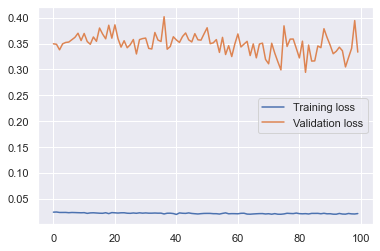

In [ ]:
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
X_test = scaler.inverse_transform(X_test)
X_test

array([[1.16643742e+11, 1.49637585e+11, 2.09026502e+11, ...,
        1.18371991e+11, 1.10359197e+11, 1.07436177e+11],
       [1.22208441e+11, 1.83431079e+11, 2.97595033e+11, ...,
        1.19750662e+11, 1.10099959e+11, 1.07898766e+11],
       [1.21403467e+11, 1.60622563e+11, 2.90185648e+11, ...,
        1.16598668e+11, 1.09093919e+11, 1.07056375e+11],
       ...,
       [1.17220247e+11, 1.55136558e+11, 2.73674921e+11, ...,
        1.26124731e+11, 1.04792506e+11, 1.07762353e+11],
       [1.25536819e+11, 1.68160444e+11, 3.02424861e+11, ...,
        1.26856122e+11, 1.09770021e+11, 1.08679763e+11],
       [1.22614056e+11, 1.53520534e+11, 3.19870102e+11, ...,
        1.27421731e+11, 1.03336227e+11, 1.07623171e+11]])

In [ ]:
# Unfortunately, the model with optimized parameters (5.6%) performs worst than the original model (mean loss 0.47%). This could be explain by the consecutive grid search
# method where we assume that the order of the steps does not influence the result, as an example, we first find the number of epochs and then the optimizer but a better combinaison of epochs / optimizer 
# could exist if we include both parameters in one grid. However, this would be too ressource intensive to run.
# The more likely explanation is that we made a mistake somewhere that we were not able to find out.

## Calculation of prediction interval(90% confidence level)

** For 90% confidence level, t-multiplier is 1.645 which is calculated from degree of freedom of the sample.


t-multiplier(1.645) * standard deviation(stdev) gives the magnitude of interval.

The minimum and maximum range is given by :
confidence min = value-interval
confidence max = value + interval

In [ ]:
df_forecast = pd.DataFrame({'Date':Final.Date[-predictions.shape[0]:],'Close':predictions[:,0]})
df_forecast.head(6)

,Date,Close
1288,2018-07-12,106.379028
1289,2018-07-13,106.379028
1292,2018-07-16,106.379028
1293,2018-07-17,106.379028
1294,2018-07-18,106.379028
1295,2018-07-19,106.379028


In [ ]:
sum_err = np.sum((Y_test-y_pred_future[0]))

print(sum_err)

x = (1/(len(df_forecast))*sum_err)

stdev = np.sqrt(np.abs(x))

interval = 	1.645*stdev

print(interval)

-5757.610656738281
6.480374348068612


** Adding the Close Confidence Min and Close Confidence Max to the dataframe, Plus the original closing price data too.

In [ ]:
df_forecast['Close Confidence Min'] = df_forecast['Close'] - interval

df_forecast['Close Confidence Max'] = df_forecast['Close'] + interval

df_forecast['Original Close'] = Final.Close[-y_pred_future.shape[0]:]

df_forecast

,Date,Close,Close Confidence Min,Close Confidence Max,Original Close
1288,2018-07-12,107.078522,100.598145,113.558899,99.726936
1289,2018-07-13,107.078522,100.598145,113.558899,100.913826
1292,2018-07-16,107.078522,100.598145,113.558899,100.416107
1293,2018-07-17,107.078522,100.598145,113.558899,101.411552
1294,2018-07-18,107.078522,100.598145,113.558899,100.617088
...,...,...,...,...,...
1818,2019-12-24,107.078522,100.598145,113.558899,154.117065
1820,2019-12-26,107.078522,100.598145,113.558899,155.380295
1821,2019-12-27,107.078522,100.598145,113.558899,155.664307
1824,2019-12-30,107.078522,100.598145,113.558899,154.322708


** Ploting the Closing Price(Original and Predicted) with the Close Confidence Min as 'Lower Bound' and Close Confidence Max as 'Upper Bound' which gives the idea of the Model's 90% Confidence Level.

In [ ]:

     
fig3=go.Figure(data=[
                        go.Scatter(
                                    name = 'Close',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Original Close']),
                     
                        go.Scatter(
                                    name = 'Close Predicted',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close']),

                        go.Scatter(
                                    name='Upper Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Max'],
                                    mode='lines',
                                    marker=dict(color="green"),
                                    line=dict(width=1),
                                    showlegend=False),

                         go.Scatter(
                                    name='Lower Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Min'],
                                    marker=dict(color="purple"),
                                    line=dict(width=1),
                                    mode='lines',
                                    fillcolor='rgba(68, 68, 68, 0.3)',
                                    fill='tonexty',
                                    showlegend=False)

                    ])

fig3.show()

###Question 20:  Calculation of prediction interval for your prediction and explain the time series plots
# By changing the type of optimizer choosing Nadam as indicated by our tests, the predicted closes are more accurate and the confidence interval includes more of the actual closes.
# The predicted close values follow the upward and downward trend of the closes well. This means that the model is trained efficiently.
# The whole prediction model seems to fit quite well with the actual values, except during the period December 2021 - January 2022 when the peak was reached.
# Perhaps by changing some parameters the model could be even better.